In [ ]:

from sklearn.cluster._hdbscan.hdbscan import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import  ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
  warnings.simplefilter("ignore")
np.random.seed(42)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
key = "\t"
df = pd.read_excel(r"/content/drive/MyDrive/DA_Unigap/Machine Learning/Final_Project/churn_prediction.xlsx")
df.shape

(5630, 20)

In [ ]:
df = df[df['Churn'] == 1].reset_index(drop=True)

In [ ]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
0,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,...,4,Single,3,1,26.0,2.0,2.0,1.0,143.59,1
1,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,...,4,Single,3,1,26.0,1.0,2.0,1.0,143.59,1
2,50768,1,9.0,Computer,1,16.0,CC,Female,3.0,4,...,4,Single,2,1,25.0,1.0,1.0,0.0,118.59,1


# Missing Value

In [ ]:
# Xử lý missing value
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-220399394.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-220399394.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
missing_rows_pct = df.isnull().any(axis=1).mean()*100
missing_rows_pct

np.float64(0.0)

# Duplicate

In [ ]:
df.duplicated().any()

np.False_

# Encoding

# 2. Unsupervised Learning

In [ ]:
list_encode_cols = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
df_encoded = pd.get_dummies(df, columns=list_encode_cols, drop_first=True)
df_encoded = df_encoded.drop(columns=['CustomerID'])

In [ ]:
df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,1.0,1,17.0,4.0,5,4,3,1,26.0,...,False,False,False,False,False,False,True,False,False,True
1,1,1.0,1,17.0,4.0,5,4,3,1,26.0,...,False,False,False,False,False,False,True,False,False,True
2,1,9.0,1,16.0,3.0,4,4,2,1,25.0,...,False,False,False,False,False,False,True,False,False,True
3,1,9.0,1,16.0,3.0,4,4,2,1,25.0,...,False,False,False,False,False,False,True,False,False,True
4,1,1.0,1,14.0,4.0,6,3,3,1,25.0,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1,21.0,1,9.0,3.0,4,4,9,1,15.0,...,False,False,True,False,False,False,False,True,False,True
944,1,9.0,3,9.0,4.0,6,4,4,1,15.0,...,True,False,False,False,False,False,False,True,False,True
945,1,5.0,1,19.0,3.0,4,3,3,0,15.0,...,False,False,False,False,False,False,False,True,True,False
946,1,21.0,1,9.0,3.0,4,4,9,1,15.0,...,False,False,True,False,False,False,False,True,False,True


Dimension Reduction

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_encoded)
PCA_ds = pd.DataFrame(pca.transform(df_encoded), columns=(["col1", "col2", "col3"]))
PCA_ds

,col1,col2,col3
0,-17.035729,1.491069,-2.462352
1,-17.054231,1.507437,-2.475374
2,-41.779489,0.192237,6.373154
3,-41.797992,0.208605,6.360132
4,25.186519,-2.154070,-4.605009
...,...,...,...
943,157.963491,-11.592041,10.375091
944,152.853100,-10.166945,-2.475780
945,160.385304,-0.169213,-5.252077
946,158.000495,-11.624776,10.401135


In [ ]:
# Check từng cột có bnhieu %
pca.explained_variance_ratio_

array([0.91204739, 0.04237414, 0.01705347])

Apply K-Means model

1. Choosing K

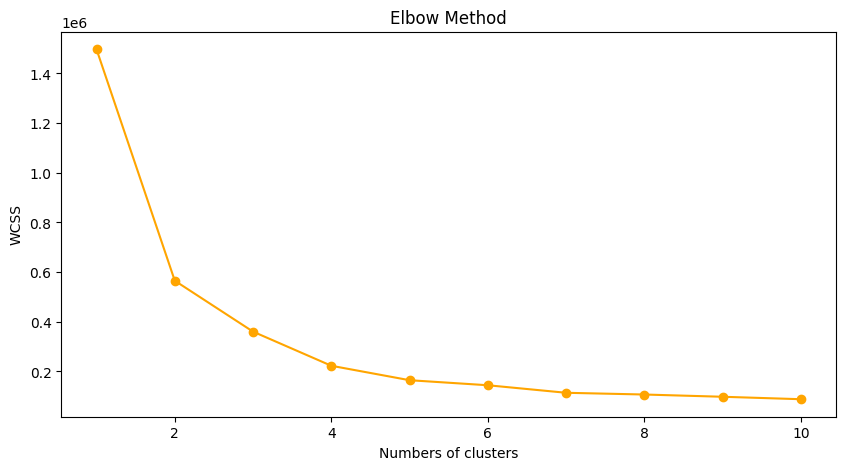

In [ ]:
ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_ds)

    ss.append(kmeans.inertia_)
#Plot
plt.figure(figsize = (10,5))
plt.plot(range(1, max_clusters+1), ss, marker = 'o', linestyle = 'solid', color = 'orange')
plt.title('Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

chọn k = 3



2. Apply K-Means

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_labels = kmeans.fit_predict(PCA_ds)

PCA_ds['clusters'] = predicted_labels
df['clusters'] = predicted_labels

In [ ]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,clusters
0,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,...,4,Single,3,1,26.0,2.0,2.0,1.0,143.59,1
1,55053,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,...,4,Single,3,1,26.0,1.0,2.0,1.0,143.59,1
2,50768,1,9.0,Computer,1,16.0,CC,Female,3.0,4,...,4,Single,2,1,25.0,1.0,1.0,0.0,118.59,1
3,52238,1,9.0,Computer,1,16.0,CC,Female,3.0,4,...,4,Single,2,1,25.0,0.0,1.0,0.0,118.59,1
4,52834,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,...,3,Single,3,1,25.0,2.0,2.0,7.0,185.74,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,53286,1,21.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,...,4,Single,9,1,15.0,6.0,14.0,9.0,317.46,0
944,53604,1,9.0,Mobile Phone,3,9.0,E wallet,Female,4.0,6,...,4,Single,4,1,15.0,1.0,2.0,12.0,313.24,0
945,54206,1,5.0,Mobile Phone,1,19.0,Cash on Delivery,Female,3.0,4,...,3,Married,3,0,15.0,2.0,16.0,9.0,320.45,0
946,54756,1,21.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,...,4,Single,9,1,15.0,8.0,14.0,9.0,317.46,0


# Ecaluating Model

1. Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_ds, predicted_labels)
sil_score

np.float64(0.5575518458729186)

Kết quả mức tương đối


In [ ]:
from sklearn.metrics import balanced_accuracy_score

df_encoded['clusters'] = predicted_labels

X = df_encoded.drop(columns = {'clusters'})
y = df_encoded['clusters']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier (max_depth = 15, random_state = 0, n_estimators = 100)

clf_rand.fit(x_train, y_train)
y_ranf_pre_train = clf_rand.predict(x_test)
balanced_accuracy_val = balanced_accuracy_score(y_test, y_ranf_pre_train)

balanced_accuracy_val



np.float64(0.9969696969696971)

In [ ]:
feats = {} # feature importance
for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient = 'index'). rename(columns = {0: 'Gini-importance'})
importances = importances.sort_values(by = 'Gini-importance', ascending = True)

importances = importances.reset_index()

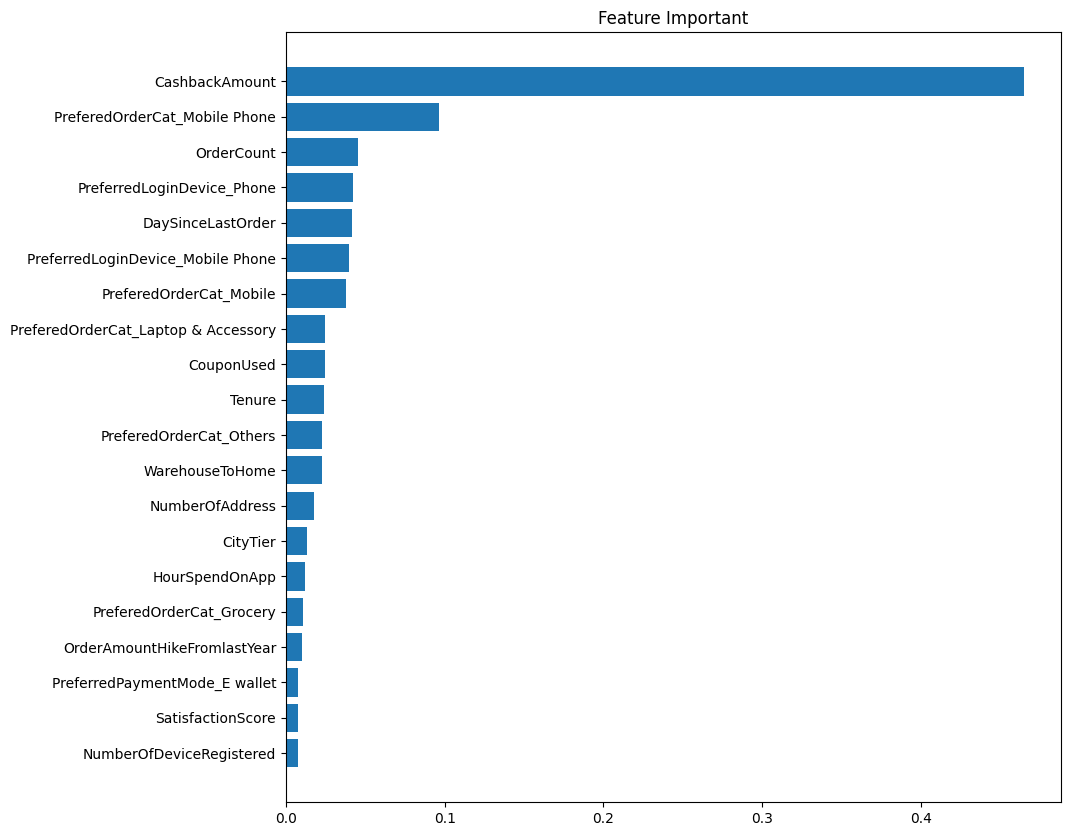

In [ ]:
# bar chart
plt.figure (figsize = (10, 10))
plt.barh(importances.tail(20) ['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

plt.show()

2. Distribution of cluster

/tmp/ipython-input-1234831133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot( x = df["clusters"], palette = pal)
/tmp/ipython-input-1234831133.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl = sns.countplot( x = df["clusters"], palette = pal)


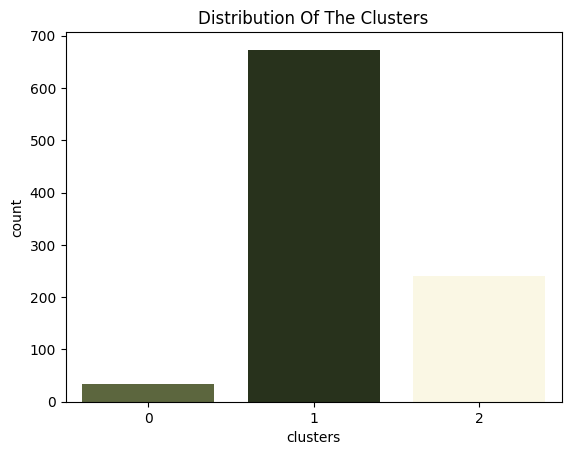

In [ ]:
pal = ["#606c38", "#283618", "#fefae0", "#dda15e"]
pl = sns.countplot( x = df["clusters"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<Axes: xlabel='clusters', ylabel='CashbackAmount'>

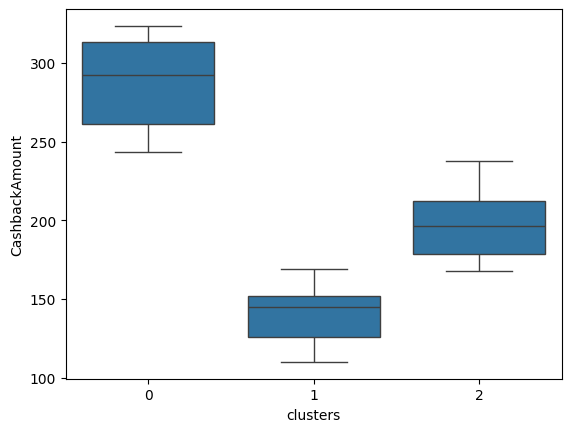

In [ ]:
sns.boxplot(data = df, x = df["clusters"], y = df["CashbackAmount"])


In [ ]:
df.groupby(['clusters', 'Churn'])[['Gender']].count().reset_index()

,clusters,Churn,Gender
0,0,1,34
1,1,1,673
2,2,1,241
